Loading data...
Loaded B0005 data (50285 rows)
Loaded B0006 data (50285 rows)
Loaded B0018 data (34866 rows)

Plotting SoH Degradation...


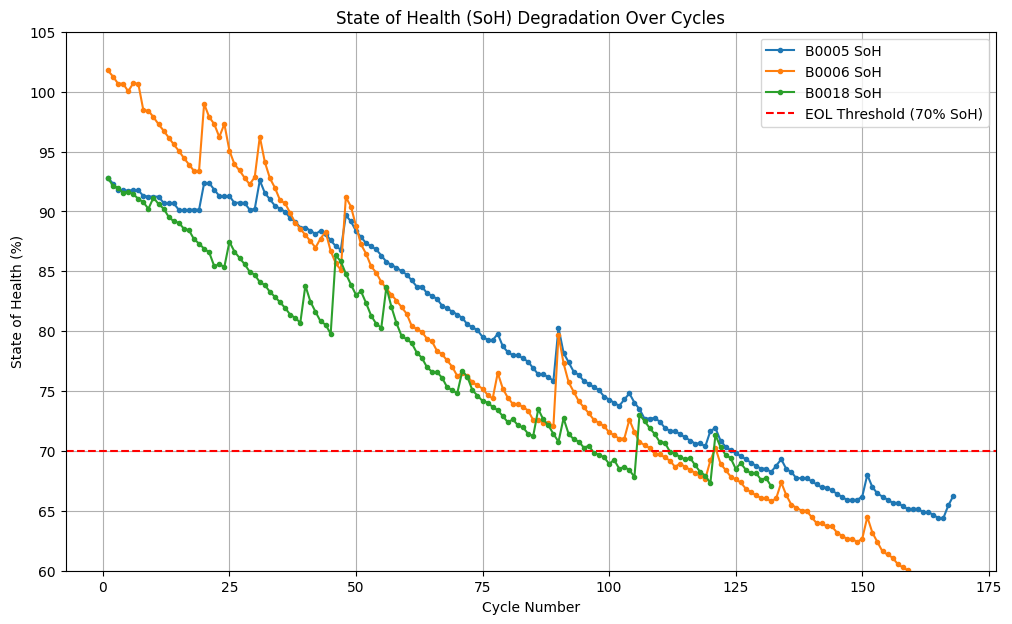


SoH Plot generated.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np # Ensure numpy is imported

# --- Configuration ---
# Adjust this path if your CSV files are in a different directory
data_directory = '../data/processed_data'
filenames = {
    "B0005": os.path.join(data_directory, "B0005_discharge_with_SoH_SoC_RUL.csv"),
    "B0006": os.path.join(data_directory, "B0006_discharge_with_SoH_SoC_RUL.csv"),
    "B0018": os.path.join(data_directory, "B0018_discharge_with_SoH_SoC_RUL.csv")
}
batteries_data = {}

# --- 1. Load Data ---
print("Loading data...")
for name, filepath in filenames.items():
    if os.path.exists(filepath):
        try:
            batteries_data[name] = pd.read_csv(filepath)
            print(f"Loaded {name} data ({len(batteries_data[name])} rows)")
        except Exception as e:
            print(f"Error loading {filepath}: {e}")
            batteries_data[name] = None # Mark as None if loading fails
    else:
        print(f"File not found: {filepath}. Skipping {name}.")
        batteries_data[name] = None

# Filter out None values in case some files were missing/failed to load
valid_battery_names = [name for name, df in batteries_data.items() if df is not None]

# --- 2. Plot SoH Degradation ---
print("\nPlotting SoH Degradation...")
plt.figure(figsize=(12, 7))

for name in valid_battery_names:
    df = batteries_data[name]
    # Extract unique SoH for each cycle
    # Group by 'cycle' and take the first SoH value (it should be the same for all rows in a cycle)
    soh_per_cycle = df.groupby('cycle')['SoH'].first()

    # Create cycle numbers array corresponding to the soh_per_cycle data
    cycle_numbers = soh_per_cycle.index.to_numpy() # Use the index from groupby

    plt.plot(cycle_numbers, soh_per_cycle, marker='.', linestyle='-', label=f'{name} SoH')

# Add EOL threshold line (assuming 2Ah nominal, 30% fade -> 1.4Ah -> 70% SoH)
eol_threshold = 70
plt.axhline(y=eol_threshold, color='r', linestyle='--', label=f'EOL Threshold ({eol_threshold}% SoH)')

plt.title('State of Health (SoH) Degradation Over Cycles')
plt.xlabel('Cycle Number')
plt.ylabel('State of Health (%)')
plt.legend()
plt.grid(True)
plt.ylim(60, 105) # Adjust ylim for better visualization if needed
plt.savefig('./figs/SoH_Degradation_Over_Cycles.png')
plt.show()

print("\nSoH Plot generated.")


Plotting Discharge Curves for Cycle 2...


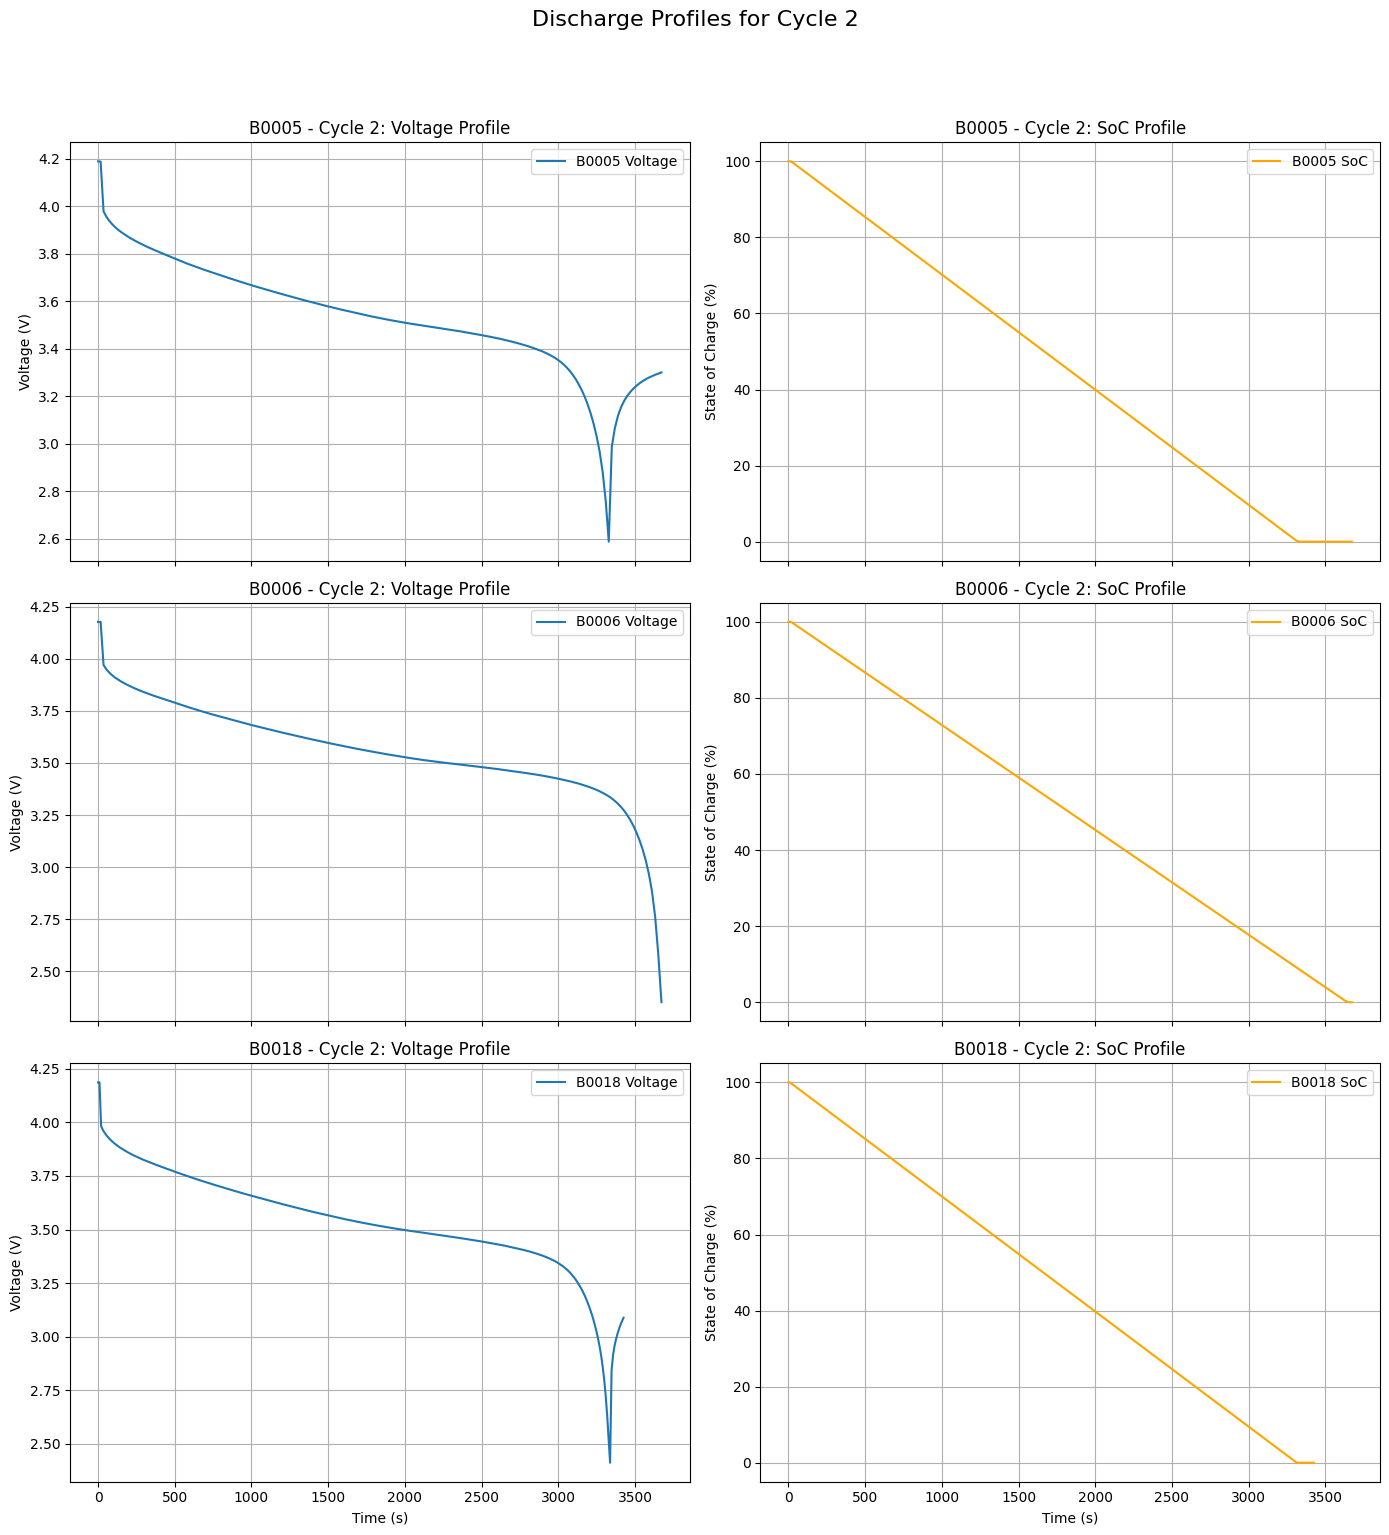


Discharge Curve Plots generated.


In [7]:
import matplotlib.pyplot as plt
import pandas as pd # Make sure pandas is imported if running separately

# --- Configuration ---
cycle_to_plot = 2 # Choose a cycle to visualize (e.g., an early cycle)
# cycle_to_plot_later = 100 # Optional: Choose a later cycle

print(f"\nPlotting Discharge Curves for Cycle {cycle_to_plot}...")

num_batteries = len(valid_battery_names)
fig, axes = plt.subplots(num_batteries, 2, figsize=(14, 5 * num_batteries), sharex=True) # Share x-axis (time)

# Adjust layout if only one battery is loaded
if num_batteries == 1:
    axes = np.expand_dims(axes, axis=0)


for i, name in enumerate(valid_battery_names):
    df = batteries_data[name]
    
    # Filter data for the specific cycle
    cycle_data = df[df['cycle'] == cycle_to_plot].copy() # Use .copy() to avoid SettingWithCopyWarning
    
    if cycle_data.empty:
        print(f"Warning: No data found for cycle {cycle_to_plot} in battery {name}.")
        # Optionally disable axes if no data
        if num_batteries > 1 :
             axes[i, 0].set_title(f'{name} - Cycle {cycle_to_plot} (No Data)')
             axes[i, 1].set_title(f'{name} - Cycle {cycle_to_plot} (No Data)')
             axes[i, 0].grid(True)
             axes[i, 1].grid(True)
        else: # handles case where only one battery exists and it has no data for that cycle
             axes[0].set_title(f'{name} - Cycle {cycle_to_plot} (No Data)')
             axes[1].set_title(f'{name} - Cycle {cycle_to_plot} (No Data)')
             axes[0].grid(True)
             axes[1].grid(True)
        continue

    # Plot Voltage vs. Time
    ax_volt = axes[i, 0] if num_batteries > 1 else axes[0]
    ax_volt.plot(cycle_data['time'], cycle_data['voltage_measured'], label=f'{name} Voltage')
    ax_volt.set_title(f'{name} - Cycle {cycle_to_plot}: Voltage Profile')
    ax_volt.set_ylabel('Voltage (V)')
    ax_volt.grid(True)
    ax_volt.legend()

    # Plot SoC vs. Time
    ax_soc = axes[i, 1] if num_batteries > 1 else axes[1]
    ax_soc.plot(cycle_data['time'], cycle_data['SoC'], label=f'{name} SoC', color='orange')
    ax_soc.set_title(f'{name} - Cycle {cycle_to_plot}: SoC Profile')
    ax_soc.set_ylabel('State of Charge (%)')
    ax_soc.grid(True)
    ax_soc.legend()

    # Set common X label only for the bottom plots
    if i == num_batteries - 1:
         ax_volt.set_xlabel('Time (s)')
         ax_soc.set_xlabel('Time (s)')


plt.suptitle(f'Discharge Profiles for Cycle {cycle_to_plot}', fontsize=16, y=1.02) # Add overall title
plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust layout to prevent title overlap
plt.savefig('./figs/Discharge_Profiles_for_Cycle_2.png')
plt.show()

print("\nDischarge Curve Plots generated.")


Calculating and Plotting Correlation Matrix...


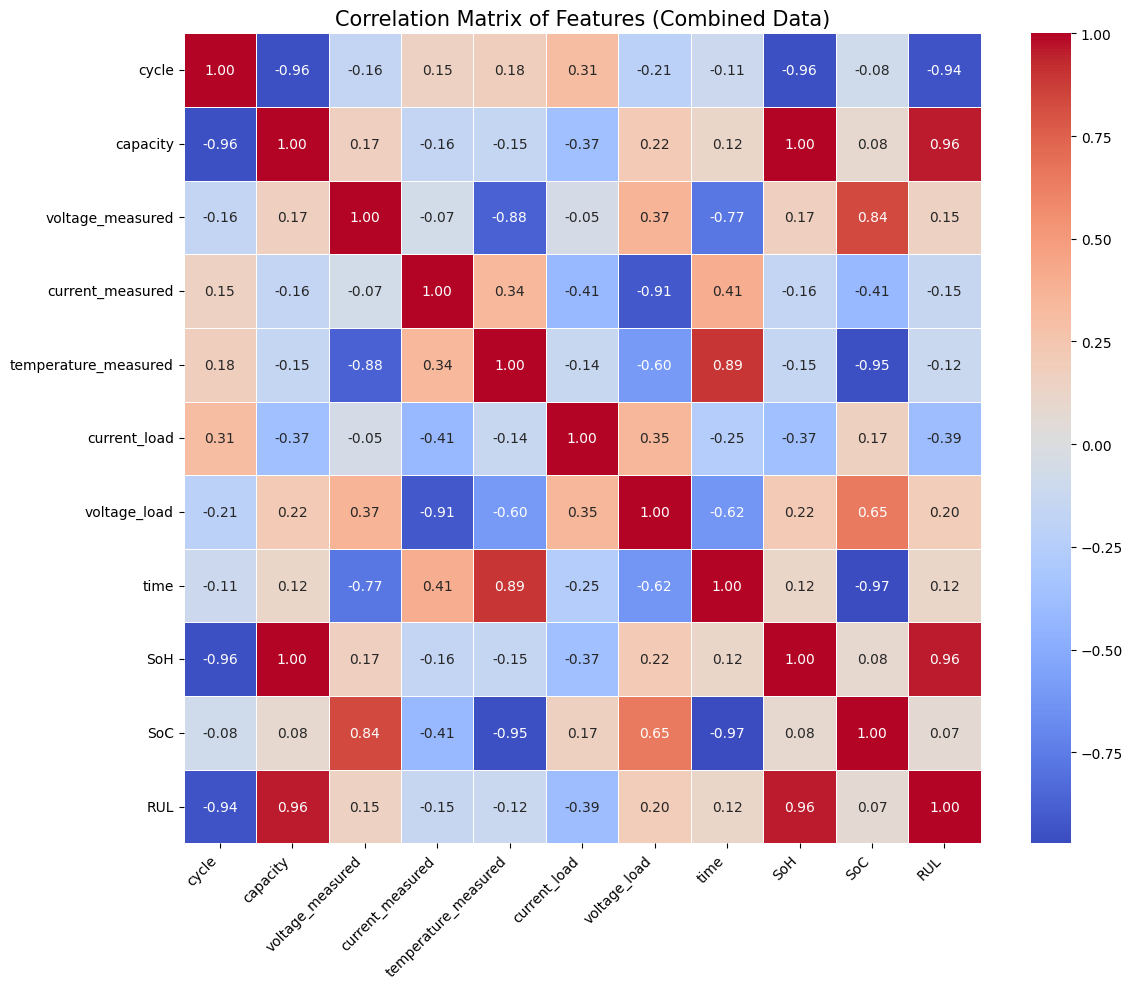


Correlation Heatmap generated.

Correlations with SoH:
capacity                1.000000
SoH                     1.000000
RUL                     0.956398
voltage_load            0.219676
voltage_measured        0.173422
time                    0.117745
SoC                     0.083379
temperature_measured   -0.154641
current_measured       -0.161553
current_load           -0.367365
cycle                  -0.955432
Name: SoH, dtype: float64

Correlations with SoC:
SoC                     1.000000
voltage_measured        0.835218
voltage_load            0.649583
current_load            0.165705
capacity                0.083379
SoH                     0.083379
RUL                     0.074849
cycle                  -0.078730
current_measured       -0.414305
temperature_measured   -0.950587
time                   -0.971962
Name: SoC, dtype: float64


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd # Make sure pandas is imported if running separately
import numpy as np

# --- Combine data for overall correlation (Optional but often insightful) ---
# Or calculate per battery - choose based on your goal
print("\nCalculating and Plotting Correlation Matrix...")

# Combine data from all valid batteries
combined_df = pd.concat([batteries_data[name] for name in valid_battery_names], ignore_index=True)

# Select numerical columns relevant for correlation analysis
# Exclude maybe 'ambient_temperature' if it's constant, or less relevant ones
columns_for_corr = ['cycle', 'capacity', 'voltage_measured', 'current_measured',
                    'temperature_measured', 'current_load', 'voltage_load',
                    'time', 'SoH', 'SoC', 'RUL']

# Ensure only numeric types are present (handle potential errors)
numeric_df = combined_df[columns_for_corr].apply(pd.to_numeric, errors='coerce')
# Drop rows with NaN that might have been introduced by coercion, though unlikely with previous processing
numeric_df.dropna(inplace=True)


if not numeric_df.empty:
    correlation_matrix = numeric_df.corr()

    # Plotting the heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Correlation Matrix of Features (Combined Data)', fontsize=15)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.savefig('./figs/Correlation_Matrix_of_Features_Combined_Data.png')
    plt.show()
    print("\nCorrelation Heatmap generated.")

    # --- Displaying specific correlations ---
    print("\nCorrelations with SoH:")
    print(correlation_matrix['SoH'].sort_values(ascending=False))

    print("\nCorrelations with SoC:")
    print(correlation_matrix['SoC'].sort_values(ascending=False))

else:
    print("\nCould not generate correlation matrix. Check if dataframes are empty or contain non-numeric data.")

In [9]:
import pandas as pd # Make sure pandas is imported if running separately

# Set display options for better readability
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', None) # Show all columns

print("\n--- Descriptive Statistics ---")

for name in valid_battery_names:
    df = batteries_data[name]
    print(f"\n--- Statistics for Battery: {name} ---")
    print(df.describe())

print("\nDescriptive statistics displayed.")
# Reset display options if needed
# pd.reset_option('display.float_format')
# pd.reset_option('display.max_columns')


--- Descriptive Statistics ---

--- Statistics for Battery: B0005 ---
          cycle  ambient_temperature  capacity  voltage_measured  \
count 50285.000            50285.000 50285.000         50285.000   
mean     88.126               24.000     1.560             3.515   
std      45.700                0.000     0.182             0.232   
min       1.000               24.000     1.287             2.456   
25%      50.000               24.000     1.386             3.399   
50%      88.000               24.000     1.538             3.512   
75%     127.000               24.000     1.747             3.661   
max     168.000               24.000     1.856             4.223   

       current_measured  temperature_measured  current_load  voltage_load  \
count         50285.000             50285.000     50285.000     50285.000   
mean             -1.806                32.817         1.363         2.308   
std               0.611                 3.988         1.314         0.800   
min     

**Key Insights from Correlations:**

1.  **SoH Drivers:**
    *   **`cycle` (-0.96):** Extremely strong negative correlation. This confirms that the primary factor driving SoH down is the number of cycles the battery has undergone. This will be your most powerful predictive feature for SoH.
    *   **`capacity` (1.00) / `RUL` (0.96):** These are highly correlated because they are directly calculated from/related to SoH and cycle number. `capacity` *is* essentially the SoH target (just scaled differently), and `RUL` is derived from `cycle`. We can predict `capacity` or `SoH` directly; `RUL` is determined by the cycle number.
    *   **`current_load` (-0.37):** Moderate negative correlation. This might indicate that as the battery degrades, its ability to handle the constant current discharge changes slightly, or perhaps there are subtle measurement artifacts. Could be a secondary feature.
    *   **Voltages & Temperature:** `voltage_load` (0.22), `voltage_measured` (0.17), `temperature_measured` (-0.15) show only weak direct correlations with SoH *across all data points*. This doesn't mean they are useless! It means their instantaneous values aren't great predictors of the *overall* SoH. However, *changes* in voltage/temperature behavior *from cycle to cycle* (e.g., faster voltage drop, higher peak temperature) are often strong indicators of degradation. This points towards needing **feature engineering**.

2.  **SoC Drivers (Within a Cycle):**
    *   **`time` (-0.97):** Very strong negative correlation. As time progresses in a discharge, SoC drops. Expected and confirms `time` is crucial for within-cycle SoC prediction.
    *   **`temperature_measured` (-0.95):** Very strong negative correlation. As the battery discharges (SoC drops), the temperature *rises* significantly due to internal resistance. Temperature is a surprisingly strong indicator of discharge progress (and thus SoC).
    *   **`voltage_measured` (0.84) / `voltage_load` (0.65):** Strong positive correlation. As expected, voltage drops as SoC decreases. This is the classic indicator for SoC.
    *   **`current_measured` (-0.41):** Moderate negative correlation. Reflects the constant current discharge.
    *   **SoH/Cycle/RUL:** Very weak correlation with instantaneous SoC, confirming they represent different aspects (long-term health vs. current charge state).

**Conclusions for Modeling:**

*   **SoH Prediction:** Needs to be approached on a **cycle-by-cycle** basis. The primary input will be the `cycle` number. To improve accuracy, we should engineer features that summarize the *behavior within each discharge cycle* (e.g., average voltage, temperature rise, discharge duration) as these summary statistics are more likely to correlate with SoH changes than instantaneous measurements.
*   **SoC Prediction:** Can be approached on a **time-step basis** within a cycle. Key inputs are the instantaneous `voltage_measured`, `temperature_measured`, `current_measured`, and `time` elapsed in the current discharge cycle. The battery's current `SoH` or `cycle` number could also be added as input features, as the voltage-SoC relationship changes slightly as the battery ages.

In [11]:
import pandas as pd
import numpy as np
import os

# --- Configuration ---
data_directory = '../data/processed_data'
filenames = {
    "B0005": os.path.join(data_directory, "B0005_discharge_with_SoH_SoC_RUL.csv"),
    "B0006": os.path.join(data_directory, "B0006_discharge_with_SoH_SoC_RUL.csv"),
    "B0018": os.path.join(data_directory, "B0018_discharge_with_SoH_SoC_RUL.csv")
}
batteries_data_raw = {}
cycle_summary_list = []

# --- Load Raw Data ---
print("Loading raw data again for cycle summary...")
for name, filepath in filenames.items():
    if os.path.exists(filepath):
        try:
            batteries_data_raw[name] = pd.read_csv(filepath)
            print(f"Loaded raw {name} data ({len(batteries_data_raw[name])} rows)")
            # --- Add Check: Print column names and head for one file ---
            if name == "B0005": # Just check one file is enough
                print(f"Columns in loaded {name}: {batteries_data_raw[name].columns.tolist()}")
                print(f"Head of key columns for {name}:\n{batteries_data_raw[name][['cycle', 'capacity', 'SoH', 'RUL', 'ambient_temperature']].head()}")
        except Exception as e:
            print(f"Error loading {filepath}: {e}")
            batteries_data_raw[name] = None
    else:
        print(f"File not found: {filepath}. Skipping {name}.")
        batteries_data_raw[name] = None

# --- Feature Engineering: Create Cycle-Level Summary ---
print("\nPerforming Feature Engineering (Cycle-Level Summary)...")

for name, df in batteries_data_raw.items():
    if df is None:
        continue

    print(f"Processing {name}...")
    required_cols = ['cycle', 'capacity', 'SoH', 'RUL', 'ambient_temperature', 'time', 'voltage_measured', 'temperature_measured']
    if not all(col in df.columns for col in required_cols):
         print(f"Skipping {name}: One or more required columns missing.")
         # Print existing columns for debugging
         print(f"Available columns: {df.columns.tolist()}")
         continue

    # --- Check for NaNs before grouping ---
    print(f"NaN check for key columns in {name} before grouping:")
    print(df[['capacity', 'SoH', 'RUL', 'ambient_temperature']].isnull().sum())


    # Sort by cycle and time to ensure correct start/end values
    df = df.sort_values(by=['cycle', 'time']).reset_index(drop=True)

    # Define aggregation functions
    # **MODIFICATION:** Use 'mean' for columns expected to be constant per cycle
    # Using lambda for start values is still appropriate
    agg_funcs = {
        'capacity': 'mean', # Changed from 'first'
        'SoH': 'mean',      # Changed from 'first'
        'RUL': 'mean',      # Changed from 'first'
        'ambient_temperature': 'mean', # Changed from 'first'
        'time': 'max', # Discharge time
        'voltage_measured': ['mean', 'min', lambda x: x.iloc[0] if not x.empty else np.nan], # Mean, Min, Start Voltage
        'temperature_measured': ['mean', 'max', lambda x: x.iloc[0] if not x.empty else np.nan] # Mean, Max, Start Temp
    }

    # Group by cycle and aggregate
    cycle_grouped = df.groupby('cycle').agg(agg_funcs)

    # --- Add Check: Inspect grouped data before renaming ---
    print(f"Head of grouped data for {name} (before renaming):")
    print(cycle_grouped.head())

    # Flatten MultiIndex columns and rename for clarity
    cycle_grouped.columns = ['_'.join(col).strip('_') for col in cycle_grouped.columns.values]
    cycle_grouped.rename(columns={
        'capacity_mean': 'capacity', # Renaming back
        'SoH_mean': 'SoH',           # Renaming back
        'RUL_mean': 'RUL',           # Renaming back
        'ambient_temperature_mean': 'ambient_temperature', # Renaming back
        'time_max': 'discharge_time',
        'voltage_measured_<lambda_0>': 'start_voltage',
        'temperature_measured_<lambda_0>': 'start_temperature',
        'voltage_measured_mean': 'mean_voltage',
        'voltage_measured_min': 'min_voltage',
        'temperature_measured_mean': 'mean_temperature',
        'temperature_measured_max': 'max_temperature'
    }, inplace=True)

    # Calculate delta features
    cycle_grouped['delta_voltage'] = cycle_grouped['start_voltage'] - cycle_grouped['min_voltage']
    cycle_grouped['delta_temperature'] = cycle_grouped['max_temperature'] - cycle_grouped['start_temperature']

    # Add battery identifier and cycle number (it's the index)
    cycle_grouped['battery_id'] = name
    cycle_grouped = cycle_grouped.reset_index() # Make 'cycle' a column

    # Select and reorder columns
    final_columns = [
        'battery_id', 'cycle', 'capacity', 'SoH', 'RUL', 'ambient_temperature',
        'discharge_time', 'start_voltage', 'mean_voltage', 'min_voltage', 'delta_voltage',
        'start_temperature', 'mean_temperature', 'max_temperature', 'delta_temperature'
    ]
    # Ensure all expected columns exist, add NaN if not
    for col in final_columns:
        if col not in cycle_grouped.columns:
            cycle_grouped[col] = np.nan

    cycle_summary = cycle_grouped[final_columns]
    cycle_summary_list.append(cycle_summary)

# Combine summaries from all batteries
if cycle_summary_list:
    all_cycle_summary = pd.concat(cycle_summary_list, ignore_index=True)
    print("\n--- Cycle Summary DataFrame Head (Corrected Attempt) ---")
    print(all_cycle_summary.head())
    print("\n--- Cycle Summary DataFrame Info (Corrected Attempt) ---")
    all_cycle_summary.info()
    print("\n--- Cycle Summary DataFrame Description (Corrected Attempt) ---")
    print(all_cycle_summary.describe())

    # Optional: Save the engineered features
    output_filename = os.path.join(data_directory, 'all_batteries_cycle_summary.csv')
    all_cycle_summary.to_csv(output_filename, index=False)
    print(f"\nCycle summary data saved to {output_filename}")

else:
    print("\nNo cycle summary data generated. Check input files and processing steps.")

Loading raw data again for cycle summary...
Loaded raw B0005 data (50285 rows)
Columns in loaded B0005: ['cycle', 'ambient_temperature', 'capacity', 'voltage_measured', 'current_measured', 'temperature_measured', 'current_load', 'voltage_load', 'time', 'SoH', 'SoC', 'RUL']
Head of key columns for B0005:
   cycle  capacity    SoH  RUL  ambient_temperature
0      1     1.856 92.824  167                   24
1      1     1.856 92.824  167                   24
2      1     1.856 92.824  167                   24
3      1     1.856 92.824  167                   24
4      1     1.856 92.824  167                   24
Loaded raw B0006 data (50285 rows)
Loaded raw B0018 data (34866 rows)

Performing Feature Engineering (Cycle-Level Summary)...
Processing B0005...
NaN check for key columns in B0005 before grouping:
capacity               0
SoH                    0
RUL                    0
ambient_temperature    0
dtype: int64
Head of grouped data for B0005 (before renaming):
      capacity    SoH

Loading cycle summary data from ../data/processed_data/all_batteries_cycle_summary.csv...
Loaded cycle summary data (468 cycles total).

Defining features (X) and target (y = SoH)...
Using features: ['cycle', 'discharge_time', 'start_voltage', 'mean_voltage', 'min_voltage', 'delta_voltage', 'start_temperature', 'mean_temperature', 'max_temperature', 'delta_temperature']

Splitting data based on cycle number (Test Ratio: 0.2)...
  Battery B0005: 168 cycles -> Train: 134, Test: 34
  Battery B0006: 168 cycles -> Train: 134, Test: 34
  Battery B0018: 132 cycles -> Train: 105, Test: 27

Total Training Samples: 373
Total Testing Samples: 95

Training RandomForestRegressor model...
Model training complete.

Evaluating model performance on the test set...
  Mean Absolute Error (MAE): 2.6805
  Root Mean Squared Error (RMSE): 3.5682

Plotting predictions vs actual values for the test set...


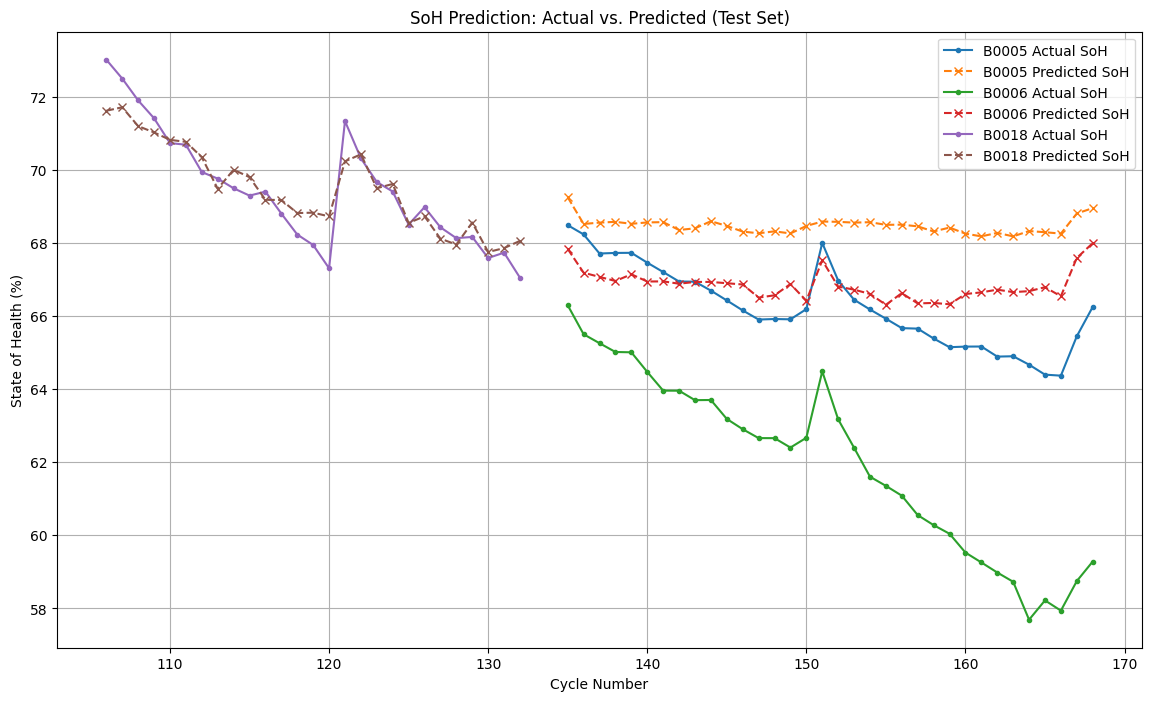


Calculating feature importances...
             Feature  Importance
1     discharge_time       0.943
3       mean_voltage       0.032
2      start_voltage       0.008
9  delta_temperature       0.007
0              cycle       0.005
8    max_temperature       0.003
7   mean_temperature       0.001
4        min_voltage       0.001
5      delta_voltage       0.001
6  start_temperature       0.000


In [13]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split # We won't use this directly for splitting
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# --- Configuration ---
data_directory = '../data/processed_data'
summary_filename = os.path.join(data_directory, 'all_batteries_cycle_summary.csv')
test_split_ratio = 0.20 # Use the last 20% of cycles for testing for each battery
target_variable = 'SoH' # Or 'capacity'

# --- Load Cycle Summary Data ---
print(f"Loading cycle summary data from {summary_filename}...")
if os.path.exists(summary_filename):
    all_cycle_summary = pd.read_csv(summary_filename)
    print(f"Loaded cycle summary data ({len(all_cycle_summary)} cycles total).")
else:
    print(f"Error: Cycle summary file not found at {summary_filename}. Exiting.")
    exit() # Or handle error appropriately

# --- 1. Define Features (X) and Target (y) ---
print(f"\nDefining features (X) and target (y = {target_variable})...")

# Select potential features
# Exclude target-related, identifiers, and constant columns
feature_columns = [
    'cycle',
    'discharge_time',
    'start_voltage',
    'mean_voltage',
    'min_voltage',
    'delta_voltage',
    'start_temperature',
    'mean_temperature',
    'max_temperature',
    'delta_temperature'
    # Add 'ambient_temperature' back if it varies or you want to test its inclusion
]

# Check if all feature columns exist in the DataFrame
available_features = [col for col in feature_columns if col in all_cycle_summary.columns]
print(f"Using features: {available_features}")

X = all_cycle_summary[available_features]
y = all_cycle_summary[target_variable]

# --- 2. Data Splitting (Cycle-Based) ---
print(f"\nSplitting data based on cycle number (Test Ratio: {test_split_ratio})...")

train_indices = []
test_indices = []

# Group data by battery_id to split each one individually
grouped_by_battery = all_cycle_summary.groupby('battery_id')

for battery_id, group in grouped_by_battery:
    n_cycles = len(group)
    split_point = int(n_cycles * (1 - test_split_ratio))

    # Ensure split_point is at least 1 to have some training data
    split_point = max(1, split_point)

    # Use original index from all_cycle_summary
    battery_indices = group.index
    train_indices.extend(battery_indices[:split_point])
    test_indices.extend(battery_indices[split_point:])

    print(f"  Battery {battery_id}: {n_cycles} cycles -> Train: {split_point}, Test: {n_cycles - split_point}")


# Create training and testing sets using the collected indices
X_train, X_test = X.loc[train_indices], X.loc[test_indices]
y_train, y_test = y.loc[train_indices], y.loc[test_indices]

# Keep track of cycle and battery_id for test set analysis
test_info = all_cycle_summary.loc[test_indices, ['battery_id', 'cycle']]

print(f"\nTotal Training Samples: {len(X_train)}")
print(f"Total Testing Samples: {len(X_test)}")

# --- 3. Model Selection & 4. Training ---
print("\nTraining RandomForestRegressor model...")

# Initialize the model (you can tune hyperparameters later)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1, max_depth=10, min_samples_split=5) # Example parameters

# Train the model
rf_model.fit(X_train, y_train)
print("Model training complete.")

# --- 5. Evaluation ---
print("\nEvaluating model performance on the test set...")

y_pred = rf_model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
# Calculate MSE first, then take the square root for RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # Use numpy's sqrt function

print(f"  Mean Absolute Error (MAE): {mae:.4f}")
print(f"  Root Mean Squared Error (RMSE): {rmse:.4f}")

# --- Optional: Visualize Predictions vs Actual ---
print("\nPlotting predictions vs actual values for the test set...")

test_results = pd.DataFrame({
    'battery_id': test_info['battery_id'],
    'cycle': test_info['cycle'],
    'Actual_SoH': y_test,
    'Predicted_SoH': y_pred
}).sort_values(by=['battery_id', 'cycle'])

plt.figure(figsize=(14, 8))
for battery_id in test_results['battery_id'].unique():
    battery_subset = test_results[test_results['battery_id'] == battery_id]
    plt.plot(battery_subset['cycle'], battery_subset['Actual_SoH'], marker='.', linestyle='-', label=f'{battery_id} Actual SoH')
    plt.plot(battery_subset['cycle'], battery_subset['Predicted_SoH'], marker='x', linestyle='--', label=f'{battery_id} Predicted SoH')

plt.title('SoH Prediction: Actual vs. Predicted (Test Set)')
plt.xlabel('Cycle Number')
plt.ylabel('State of Health (%)')
plt.legend()
plt.grid(True)
plt.show()

# --- Optional: Feature Importance ---
print("\nCalculating feature importances...")
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': available_features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

In [14]:
import joblib
import os
import json # To save feature list

# --- Specify filename and directory for the saved model ---
model_dir = 'saved_models'
model_filename = os.path.join(model_dir, 'soh_random_forest_model.joblib')
features_filename = os.path.join(model_dir, 'soh_model_features.json')

# Create the directory if it doesn't exist
os.makedirs(model_dir, exist_ok=True)
print(f"\nSaving model to {model_filename}...")

try:
    # Save the trained model object
    joblib.dump(rf_model, model_filename)
    print("Model saved successfully.")

    # --- Save the list of features the model was trained on ---
    # This is crucial for the API to ensure input data has the correct columns/order
    model_features = available_features # Get the list from your training script
    with open(features_filename, 'w') as f:
        json.dump(model_features, f)
    print(f"Model features saved to {features_filename}")

except Exception as e:
    print(f"Error saving model or features: {e}")


Saving model to saved_models/soh_random_forest_model.joblib...
Model saved successfully.
Model features saved to saved_models/soh_model_features.json


Loading time-step data for SoC modeling...
Loaded B0005 time-step data (50285 rows)
Loaded B0006 time-step data (50285 rows)
Loaded B0018 time-step data (34866 rows)
Total time-step data points: 135436

Total Training time-steps: 109263
Total Testing time-steps: 26173

Defining features (X) and target (y = SoC)...

Training RandomForestRegressor model for SoC...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s


SoC Model training complete.

Evaluating SoC model performance on the test set...
  SoC Mean Absolute Error (MAE): 1.6533
  SoC Root Mean Squared Error (RMSE): 3.5789

Plotting SoC predictions vs actual values for a sample test cycle...


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished


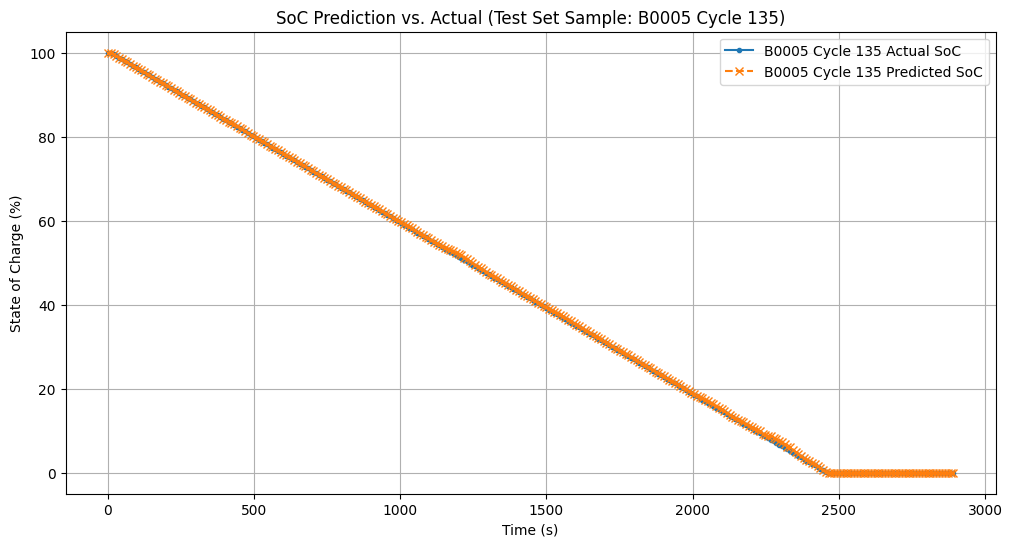


Saving SoC model to saved_models/soc_random_forest_model.joblib...
SoC Model saved successfully.
SoC Model features saved to saved_models/soc_model_features.json


In [15]:
import pandas as pd
import numpy as np
import os
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import joblib # For saving the model
import json   # For saving features

# --- Configuration ---
data_directory = '../data/processed_data'
soc_filenames = {
    "B0005": os.path.join(data_directory, "B0005_discharge_with_SoH_SoC_RUL.csv"),
    "B0006": os.path.join(data_directory, "B0006_discharge_with_SoH_SoC_RUL.csv"),
    "B0018": os.path.join(data_directory, "B0018_discharge_with_SoH_SoC_RUL.csv")
}
# Use the same cycle split indices as before for consistency
# Make sure train_indices and test_indices are available from the SoH step
# If not, regenerate them using the cycle summary file or re-run that part.
# For now, assume train_indices and test_indices are lists of the *cycle numbers*
# We need to map these back to the time-series data.

# --- Load Time-Step Data ---
print("Loading time-step data for SoC modeling...")
all_timestep_data_list = []
for name, filepath in soc_filenames.items():
    if os.path.exists(filepath):
        try:
            df = pd.read_csv(filepath)
            df['battery_id'] = name # Add battery identifier
            all_timestep_data_list.append(df)
            print(f"Loaded {name} time-step data ({len(df)} rows)")
        except Exception as e:
            print(f"Error loading {filepath}: {e}")
    else:
        print(f"File not found: {filepath}. Skipping {name}.")

if not all_timestep_data_list:
     print("Error: No time-step data loaded. Exiting.")
     exit()

all_timestep_data = pd.concat(all_timestep_data_list, ignore_index=True)
print(f"Total time-step data points: {len(all_timestep_data)}")

# --- Regenerate Train/Test Split based on Cycles (if needed) ---
# This assumes the train/test split was done based on cycle number previously
# We need the *list* of cycles belonging to train and test sets.

# Example of recreating the cycle lists (adapt if necessary)
cycle_summary_filename = os.path.join(data_directory, 'all_batteries_cycle_summary.csv')
cycle_summary_df = pd.read_csv(cycle_summary_filename)
train_cycles_map = {}
test_cycles_map = {}
test_split_ratio = 0.20

for b_id, group in cycle_summary_df.groupby('battery_id'):
    n_cycles = group['cycle'].max() # Or len(group) if cycles are contiguous
    split_cycle = int(n_cycles * (1 - test_split_ratio))
    train_cycles_map[b_id] = list(range(1, split_cycle + 1))
    test_cycles_map[b_id] = list(range(split_cycle + 1, n_cycles + 1))
    # print(f"Cycles for {b_id}: Train {train_cycles_map[b_id][-1]}, Test {test_cycles_map[b_id][0]}")


# Filter the main DataFrame based on these cycle lists
train_mask = all_timestep_data.apply(lambda row: row['cycle'] in train_cycles_map.get(row['battery_id'], []), axis=1)
test_mask = all_timestep_data.apply(lambda row: row['cycle'] in test_cycles_map.get(row['battery_id'], []), axis=1)

train_df = all_timestep_data[train_mask]
test_df = all_timestep_data[test_mask]

print(f"\nTotal Training time-steps: {len(train_df)}")
print(f"Total Testing time-steps: {len(test_df)}")

# --- 1. Define Features (X) and Target (y) ---
print("\nDefining features (X) and target (y = SoC)...")

# Include SoH calculated earlier
soc_feature_columns = [
    'time',
    'voltage_measured',
    'current_measured',
    'temperature_measured',
    'SoH' # Include overall health as context
    # 'cycle' # Optionally include cycle number
]

X_train_soc = train_df[soc_feature_columns]
y_train_soc = train_df['SoC']
X_test_soc = test_df[soc_feature_columns]
y_test_soc = test_df['SoC']

# --- 2. Model Selection & Training ---
print("\nTraining RandomForestRegressor model for SoC...")

# Initialize the model (Consider faster model or fewer estimators for large data)
# Using fewer estimators and max_depth for speed here
soc_rf_model = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_depth=15, min_samples_split=10, verbose=1)

# Train the model
soc_rf_model.fit(X_train_soc, y_train_soc)
print("SoC Model training complete.")

# --- 3. Evaluation ---
print("\nEvaluating SoC model performance on the test set...")

y_pred_soc = soc_rf_model.predict(X_test_soc)

# Calculate metrics
mae_soc = mean_absolute_error(y_test_soc, y_pred_soc)
mse_soc = mean_squared_error(y_test_soc, y_pred_soc)
rmse_soc = np.sqrt(mse_soc)

print(f"  SoC Mean Absolute Error (MAE): {mae_soc:.4f}")
print(f"  SoC Root Mean Squared Error (RMSE): {rmse_soc:.4f}")

# --- Optional: Visualize Predictions vs Actual for a sample cycle ---
print("\nPlotting SoC predictions vs actual values for a sample test cycle...")

# Choose a sample battery and cycle from the test set
sample_battery = 'B0005' # Example
sample_cycle = test_cycles_map[sample_battery][0] # First cycle in the test set

sample_data = test_df[(test_df['battery_id'] == sample_battery) & (test_df['cycle'] == sample_cycle)].copy()
sample_data['Predicted_SoC'] = soc_rf_model.predict(sample_data[soc_feature_columns])

plt.figure(figsize=(12, 6))
plt.plot(sample_data['time'], sample_data['SoC'], marker='.', linestyle='-', label=f'{sample_battery} Cycle {sample_cycle} Actual SoC')
plt.plot(sample_data['time'], sample_data['Predicted_SoC'], marker='x', linestyle='--', label=f'{sample_battery} Cycle {sample_cycle} Predicted SoC')
plt.title(f'SoC Prediction vs. Actual (Test Set Sample: {sample_battery} Cycle {sample_cycle})')
plt.xlabel('Time (s)')
plt.ylabel('State of Charge (%)')
plt.legend()
plt.grid(True)
plt.show()

# --- Save the Trained SoC Model ---
model_dir = 'saved_models' # Same directory as SoH model
soc_model_filename = os.path.join(model_dir, 'soc_random_forest_model.joblib')
soc_features_filename = os.path.join(model_dir, 'soc_model_features.json')

# Ensure directory exists (though it should from SoH step)
os.makedirs(model_dir, exist_ok=True)
print(f"\nSaving SoC model to {soc_model_filename}...")

try:
    joblib.dump(soc_rf_model, soc_model_filename)
    print("SoC Model saved successfully.")

    # Save the feature list for the SoC model
    with open(soc_features_filename, 'w') as f:
        json.dump(soc_feature_columns, f)
    print(f"SoC Model features saved to {soc_features_filename}")

except Exception as e:
    print(f"Error saving SoC model or features: {e}")